In [1]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [2]:
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词
sentence=str()
with open('perovskite相似化学式chem提取.txt', encoding='utf-8') as f: #加载原始数据库并分词
    document = f.read()
    # document_cut = jieba.cut(document)
    tokenizer = MWETokenizer([('melting', 'point'),('tolerance','factor'),('octahedral','factor'),('atomic','mass'),('specific','heat'),('formation','energy')], separator = '_')
    seg = pkuseg.pkuseg(user_dict = "userdict2.txt")
    text=tokenizer.tokenize(nltk.word_tokenize(document))
    result = ' '.join(text)
    for word in result:
        if word not in stopwords:
            if word != "\t":
                sentence += word
    with open('result_perovskite.txt', 'w',encoding="utf-8") as f2:
        f2.write(sentence)
#
sentences = word2vec.LineSentence('result.txt') #正式训练前的格式化

In [3]:
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

In [15]:
# 获取与'solvent'相关的词向量
related_words = model.most_similar("perovskite", topn=1000)# 打印选择的向量名
for word in related_words:
    print(word)

('perovskites', 0.8364019989967346)
('perovskite-type', 0.7389400005340576)
('ABO_3', 0.7318920493125916)
('SrSnO_3', 0.7303435206413269)
('LaGaO_3', 0.7280789613723755)
('Perovskite', 0.718816339969635)
('K_2NiF_4-type', 0.7132379412651062)
('Sr_2SnO_4', 0.7069746851921082)
('spinel-type', 0.7061147093772888)
('perovskite-structured', 0.7022175788879395)
('Ruddlesden–Popper', 0.6987724900245667)
('LaFeO_3', 0.6937246918678284)
('pyrochlore', 0.6899814009666443)
('bismuth-layered', 0.6893975734710693)
('Pr-substituted', 0.6836897134780884)
('Aurivillius', 0.6815159320831299)
('CH_3NH_3PbI_3', 0.6803260445594788)
('brownmillerite', 0.6793718338012695)
('LaMnO_3', 0.6790001392364502)
('perovskite-related', 0.6786607503890991)
('CsPbI_2Br', 0.6784186363220215)
('BaCeO_3', 0.674862265586853)
('scheelite-type', 0.6745976209640503)
('FAPbI_3', 0.6721267700195312)
('ZnV_2O_4', 0.6700273156166077)
('La_2NiO_4+δ', 0.668664276599884)
('manganite', 0.6674447655677795)
('09Pb', 0.6657259464263916)

In [16]:
# 将词向量和对应的词存储到字典中
word_vectors = {word: model[word] for word, _ in related_words}
word_vectors["perovskite"] = model["perovskite"]  # 添加'solvent'本身的词向量

In [17]:
# 使用TSNE进行降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(list(word_vectors.values()))

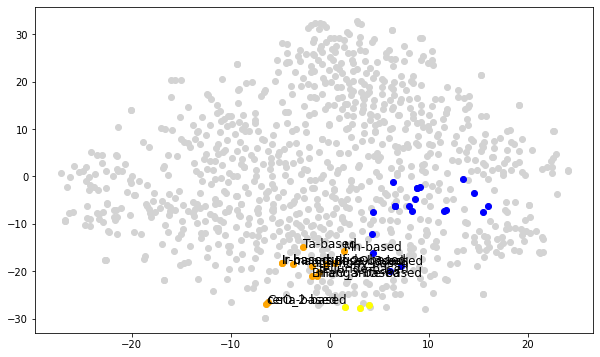

In [28]:
plt.figure(figsize=(10, 6))
dpi=1000
# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
highlight_words_blue = ['CaTiO_3','PrFeO_3','CsPbI_3','SrZrO_3','BaPbO_3','CdTiO_3','CaZnTiO_3','NdFeO_3','MgTiO_3','NaNbO_3','ZnSnO_3','NaTaO_3','ZnTiO_3','GdAlO_3','SrSnO_3', 'LaGaO_3','BaCeO_3','PrFeO_3','La_05Sr_05MnO_3','CaTiO_3','PrFeO_3']  # 蓝色高亮词汇
highlight_words_red = []  # 红色高亮词汇
highlight_words_yellow = ['FAPbI_3','CH_3NH_3PbI_3','CH_3NH_3PbBr_3']  # 黄色高亮词汇 有机无机杂化钙钛矿
highlight_words_green = ['ErMnO_3','BaTiO_3','LaGaO_3-based','thallium-based','LaGaO_3-based','BNT-based','Tl-based','BiS_2-based','ferrite-based','CZTS-based','gallate-based','In_2O_3-based'] 
highlight_words_orange = ['Ir-based','ceria-based','antimony-based','Bi_2O_3-based','manganite-based','Mn-based','telluride-based','CeO_2-based','manganese-based','BiFeO_3-based','Ir-based','sulfide-based','Ta-based'] #光催化 
# highlight_words_orange = ['SiO_2','MgO','La_2O_3','Cr_2O_3']  
# 遍历蓝色高亮词汇并绘制点
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='blue')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历红色高亮词汇并绘制点
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='red')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历黄色高亮词汇并绘制点
for word in highlight_words_yellow:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='yellow')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
    
for word in highlight_words_green:
    index = list(word_vectors.keys()).index(word)
    # plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='green')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
for word in highlight_words_orange:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='orange')
    plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
plt.savefig('聚类.png')  # 保存为PNG格式
plt.show()
# 删除了：

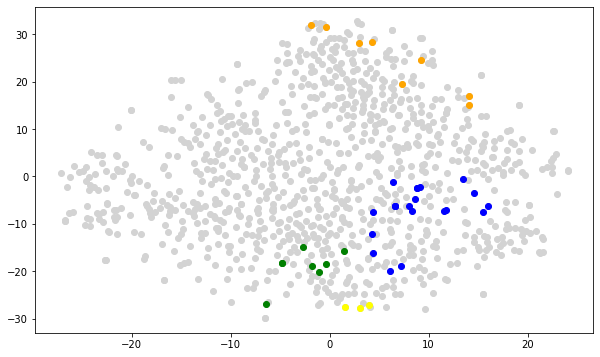

In [62]:
plt.figure(figsize=(10, 6))
dpi=1000
# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 定义不同集合的高亮词汇和颜色
highlight_words_blue = ['CaTiO_3','PrFeO_3','CsPbI_3','SrZrO_3','BaPbO_3','CdTiO_3','CaZnTiO_3','NdFeO_3','MgTiO_3','NaNbO_3','ZnSnO_3','NaTaO_3','ZnTiO_3','GdAlO_3','SrSnO_3', 'LaGaO_3','BaCeO_3','PrFeO_3','La_05Sr_05MnO_3','CaTiO_3','PrFeO_3']  # 蓝色高亮词汇
highlight_words_red = []  # 红色高亮词汇
highlight_words_yellow = ['FAPbI_3','CH_3NH_3PbI_3','CH_3NH_3PbBr_3']  # 黄色高亮词汇 有机无机杂化钙钛矿
# highlight_words_green = ['ErMnO_3','BaTiO_3','LaGaO_3-based','thallium-based','LaGaO_3-based','BNT-based','Tl-based','BiS_2-based','ferrite-based','CZTS-based','gallate-based','In_2O_3-based'] 
# highlight_words_orange = ['Ir-based','ceria-based','antimony-based','Bi_2O_3-based','manganite-based','Mn-based','telluride-based','CeO_2-based','manganese-based','BiFeO_3-based','Ir-based','sulfide-based','Ta-based'] #光催化 
highlight_words_orange = ['CoO_3','Bi_05','RuO_3','MnO_3−','TiO_3','FeO_3','MnO_3','CuO_']  
highlight_words_green = ['Ir-based','ceria-based','antimony-based','Mn-based','telluride-based','Ir-based','sulfide-based','Ta-based'] 
# 遍历蓝色高亮词汇并绘制点O_
for word in highlight_words_blue:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='blue')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历红色高亮词汇并绘制点
for word in highlight_words_red:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='red')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)

# 遍历黄色高亮词汇并绘制点
for word in highlight_words_yellow:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='yellow')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
    
for word in highlight_words_green:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='green')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
for word in highlight_words_orange:
    index = list(word_vectors.keys()).index(word)
    plt.scatter(word_vectors_tsne[index, 0], word_vectors_tsne[index, 1], color='orange')
    # plt.annotate(word, (word_vectors_tsne[index, 0], word_vectors_tsne[index, 1]), fontsize=12)
#     这一行是文字显示的行 引掉就不会显示文字，↑
plt.savefig('聚类.png')  # 保存为PNG格式
plt.show()
# 删除了：
